In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew
import seaborn as sns

In [ ]:
df=pd.read_csv('./Mall_Customers.csv')


In [ ]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.drop('CustomerID',inplace=True,axis=1)

In [ ]:
df.columns=['Gender','Age','Annual_Income','Spending_Score(1-100)']

In [ ]:
df.describe()

,Age,Annual_Income,Spending_Score(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [ ]:
df.corr()

,Gender,Age,Annual_Income,Spending_Score(1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual_Income,-0.056410,-0.012398,1.000000,0.009903
Spending_Score(1-100),0.058109,-0.327227,0.009903,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'Annual_Income'),
  Text(0, 3.5, 'Spending_Score(1-100)')])

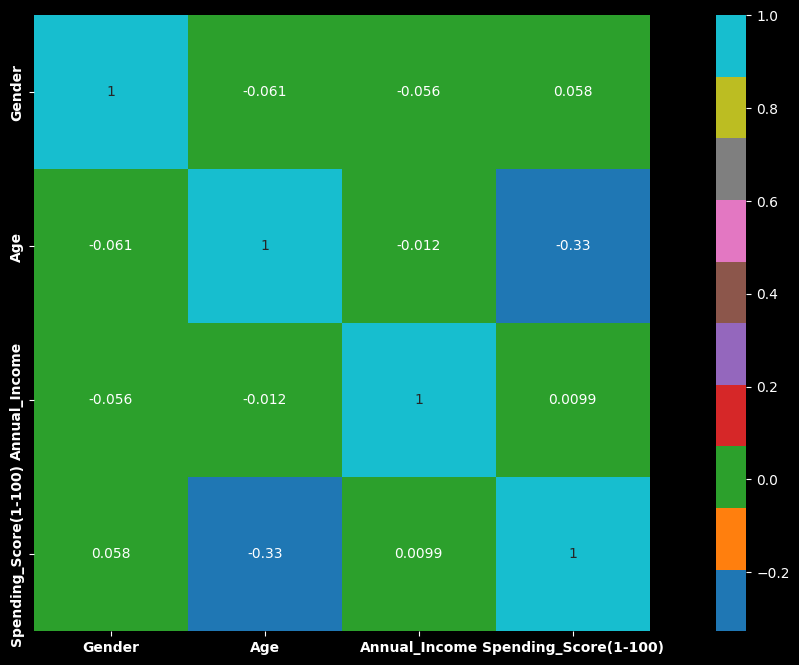

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(), annot=True,square=True,cmap='tab10')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

<Figure size 1500x1000 with 0 Axes>

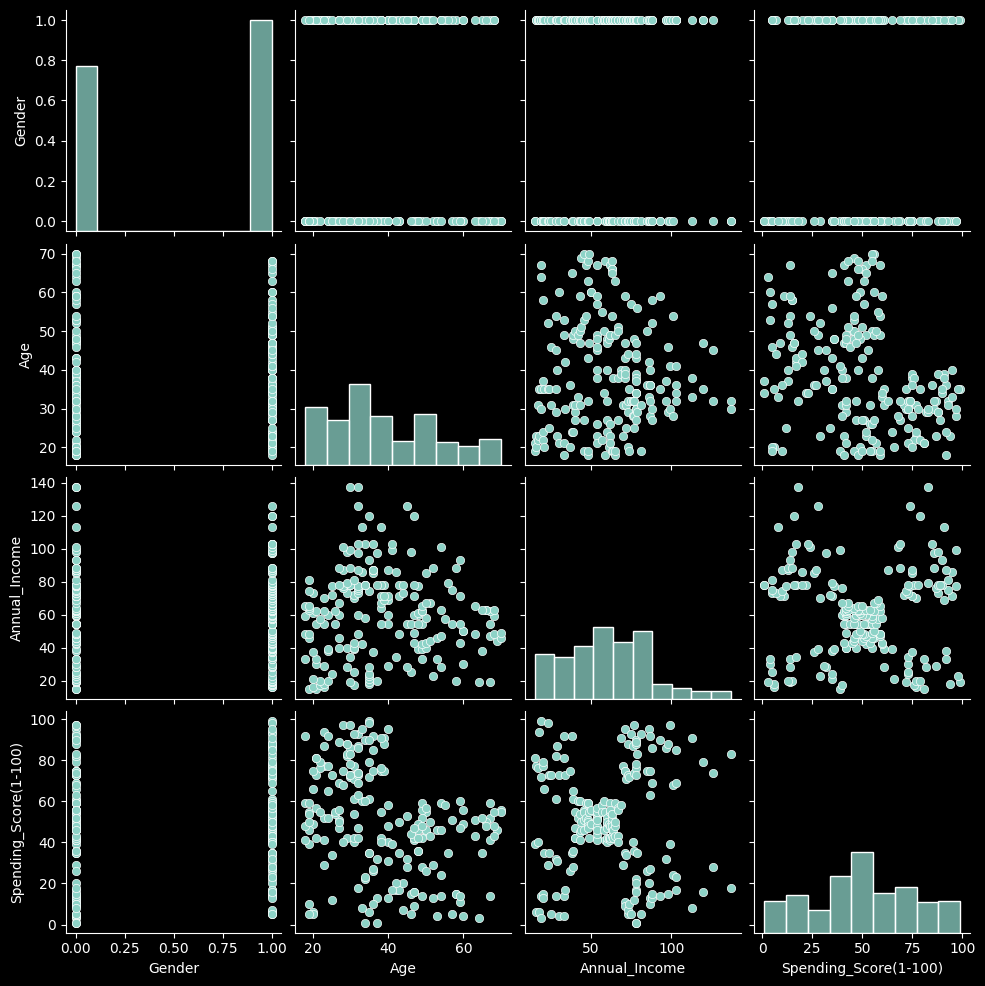

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.pairplot(df)

<Axes: >

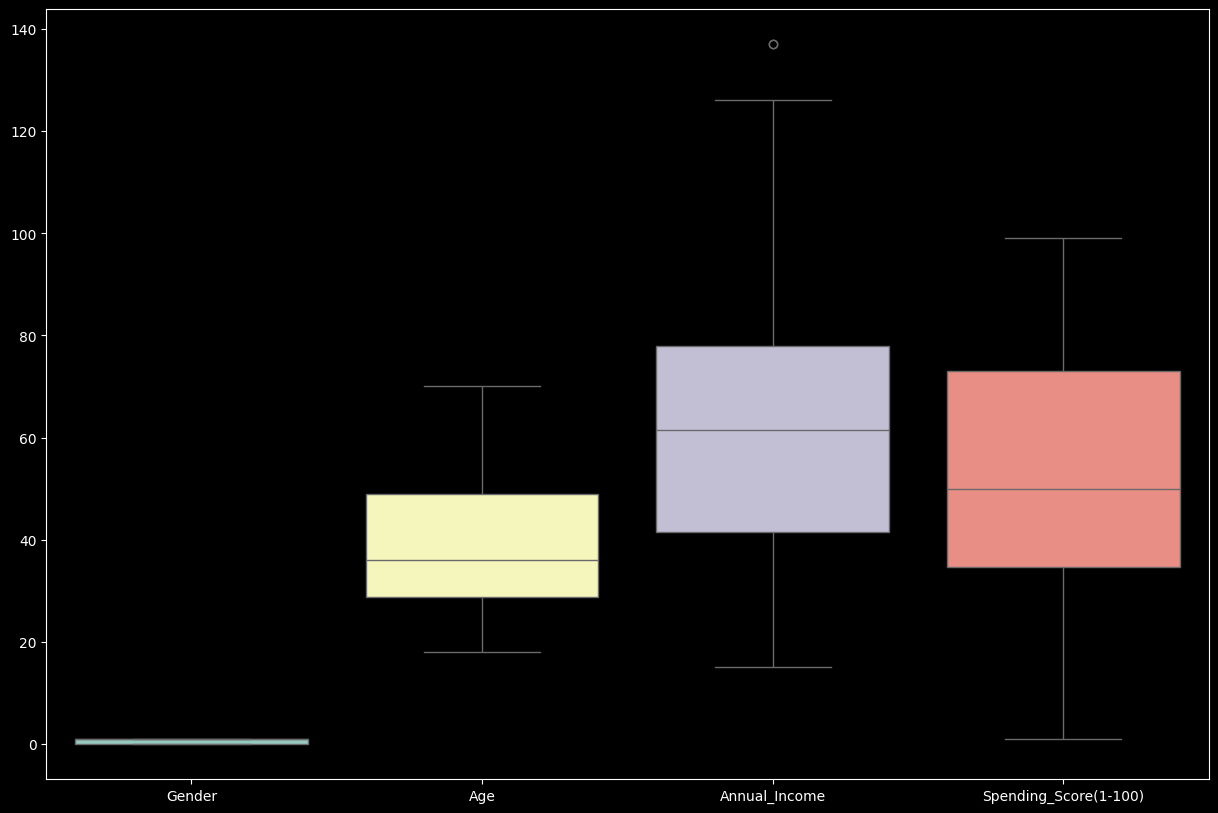

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

<Axes: ylabel='Density'>

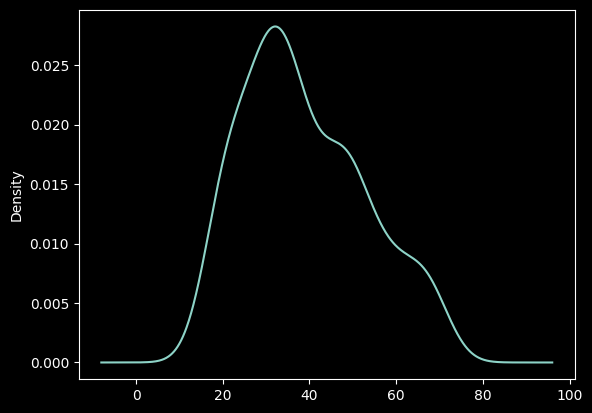

In [ ]:
df['Age'].plot.kde()

<Axes: ylabel='Density'>

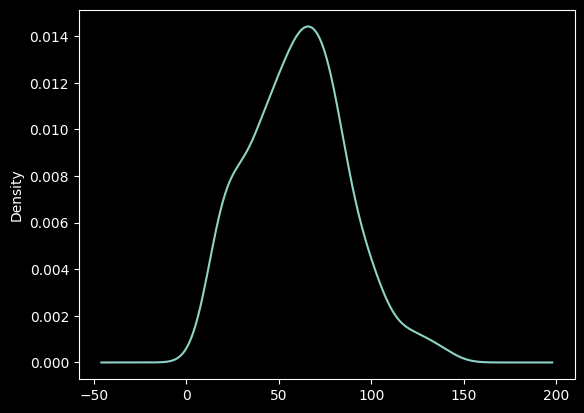

In [ ]:
df['Annual_Income'].plot.kde()

<Axes: ylabel='Density'>

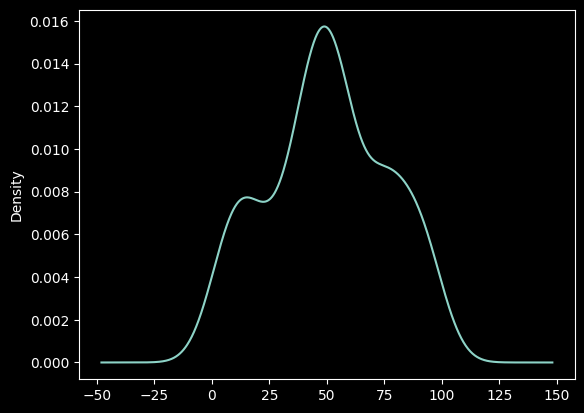

In [ ]:
df['Spending_Score(1-100)'].plot.kde()

<Axes: xlabel='Age', ylabel='Annual_Income'>

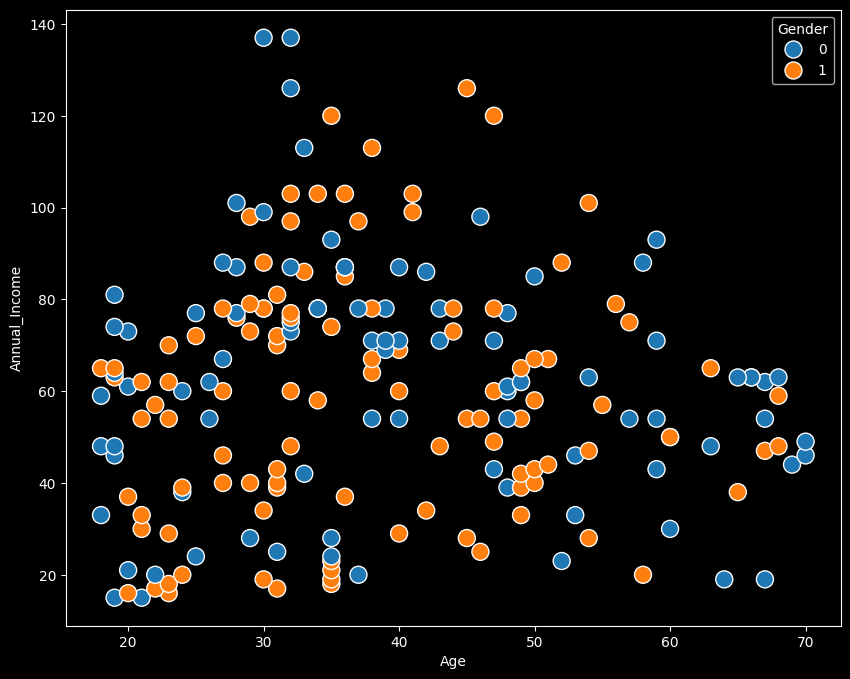

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Annual_Income',hue='Gender',data=df,s=150,palette='tab10')

<Axes: xlabel='Spending_Score(1-100)', ylabel='Annual_Income'>

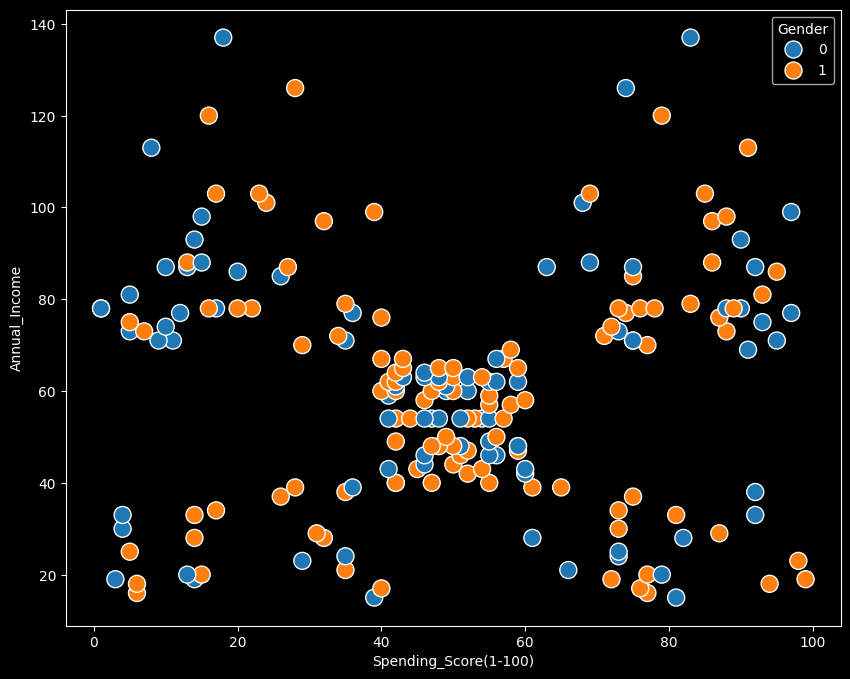

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Spending_Score(1-100)',y='Annual_Income',hue='Gender',data=df,s=150,palette='tab10')

In [ ]:
X=df[['Annual_Income','Spending_Score(1-100)']]
kmeans=KMeans(n_clusters=5,random_state=42)
df['Cluster']=kmeans.fit_predict(X)

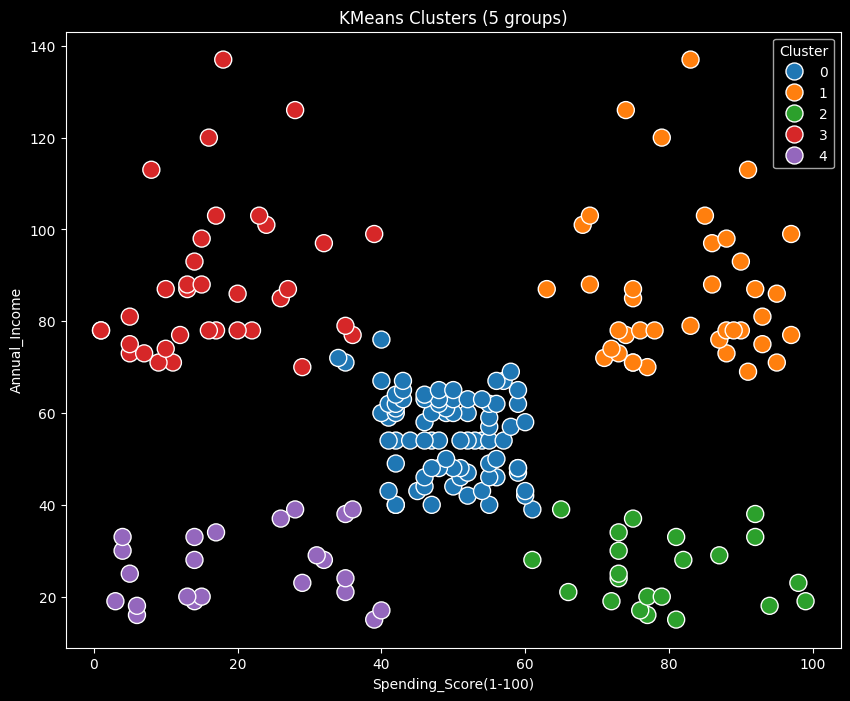

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Spending_Score(1-100)',y='Annual_Income',hue='Cluster',data=df,s=150,palette='tab10')
plt.title('KMeans Clusters (5 groups)')
plt.show()